In [644]:
# Importing the required libraries

from numpy import sqrt, pi, cos, exp, e
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import rand
from numpy.random import seed

from numpy import arange
from numpy import asarray
from numpy import meshgrid
# from matplotlib import plt

Ackley Function

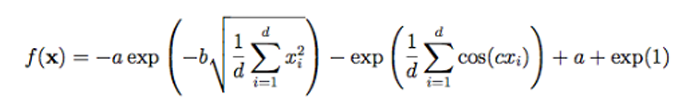

In [645]:
# Defining the Ackley function with the given values

def objective(x, y):
    a = 20
    b = 0.2
    c = 2 * pi
    d = 2
    return (
        (-1 * a) * exp((-1 * b) * sqrt((1 / d) * (x**2 + y**2)))
        - exp((1 / d) * (cos(c * x) + cos(c * y)))
        + a
        + e
    )

In [646]:
# The gradient of the Ackley function using numerical differentiation

def derivative(x, y):
    h = 1e-5
    gradient_x = (objective(x + h, y) - objective(x, y)) / h
    gradient_y = (objective(x, y + h) - objective(x, y)) / h
    return asarray([gradient_x, gradient_y])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28572\3909206629.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


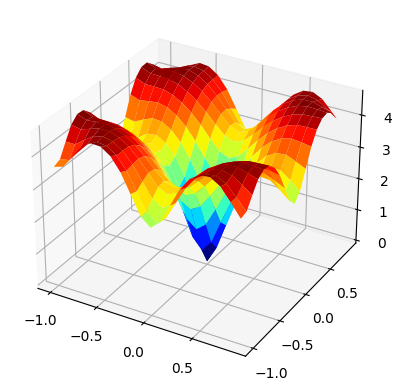

In [647]:
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
plt.show()



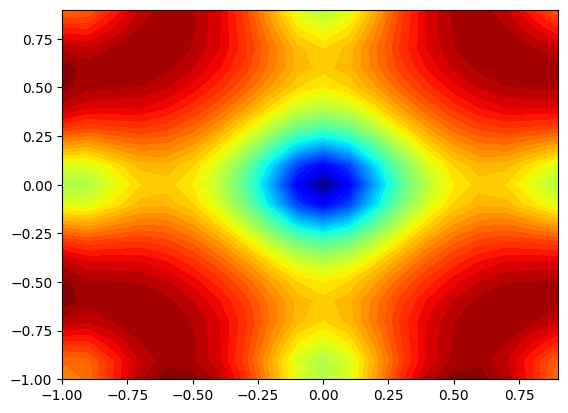

In [648]:
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
plt.show()

In [649]:
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
	solutions = []
	# generate an initial point
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	score = objective(x[0], x[1])
	scores=[]
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent updates
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(bounds.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			# mhat(t) = m(t) / (1 - beta1(t))
			mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
			x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
		# evaluate candidate point
		score = objective(x[0], x[1])
		# keep track of solutions
		solutions.append(x.copy())
		scores.append(score)
		
		
		# report progress
		if (score < 0.01): print('>%d f(%s) = %.5f' % (t, x, score))
	return x,scores,solutions

In [650]:
# seed the pseudo random number generator
seed(1)

# define the total iterations
n_iter = 1000

# steps size
alpha = 1e-3
# factor for average gradient
beta1 = 0.01
# factor for average squared gradient
beta2 = 0.02

# perform the gradient descent search with adam
adam_best, adam_scores, adam_solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)

>437 f([-0.00049815  0.00265051]) = 0.00782
>438 f([0.000489   0.00165078]) = 0.00495
>439 f([-0.00050039  0.00065124]) = 0.00234
>440 f([ 0.00049256 -0.00034599]) = 0.00171
>441 f([-0.0004947   0.00062044]) = 0.00226
>442 f([ 0.00047528 -0.00036712]) = 0.00171
>443 f([-0.00051081  0.00060361]) = 0.00225
>444 f([ 0.00046214 -0.00038234]) = 0.00171
>445 f([-0.00052267  0.00059119]) = 0.00225
>446 f([ 0.00045231 -0.00039349]) = 0.00171
>447 f([-0.00053146  0.00058189]) = 0.00225
>448 f([ 0.00044493 -0.00040179]) = 0.00171
>449 f([-0.00053801  0.00057487]) = 0.00224
>450 f([ 0.00043939 -0.00040802]) = 0.00171
>451 f([-0.0005429   0.00056953]) = 0.00224
>452 f([ 0.00043524 -0.00041275]) = 0.00171
>453 f([-0.00054655  0.00056546]) = 0.00224
>454 f([ 0.00043214 -0.00041635]) = 0.00171
>455 f([-0.00054925  0.00056234]) = 0.00224
>456 f([ 0.00042983 -0.00041912]) = 0.00171
>457 f([-0.00055125  0.00055992]) = 0.00224
>458 f([ 0.00042813 -0.00042125]) = 0.00171
>459 f([-0.00055272  0.00055805]) 

In [651]:
adam_solutions

[array([-0.16495599,  0.43964899]),
 array([-0.163956  ,  0.43864893]),
 array([-0.16295601,  0.43764887]),
 array([-0.16195602,  0.43664881]),
 array([-0.16095603,  0.43564875]),
 array([-0.15995604,  0.43464869]),
 array([-0.15895605,  0.43364863]),
 array([-0.15795606,  0.43264857]),
 array([-0.15695607,  0.43164851]),
 array([-0.15595608,  0.43064845]),
 array([-0.15495609,  0.42964839]),
 array([-0.15395611,  0.42864833]),
 array([-0.15295612,  0.42764827]),
 array([-0.15195613,  0.42664821]),
 array([-0.15095615,  0.42564815]),
 array([-0.14995616,  0.42464809]),
 array([-0.14895618,  0.42364804]),
 array([-0.14795619,  0.42264798]),
 array([-0.14695621,  0.42164792]),
 array([-0.14595622,  0.42064786]),
 array([-0.14495624,  0.4196478 ]),
 array([-0.14395626,  0.41864774]),
 array([-0.14295628,  0.41764768]),
 array([-0.14195629,  0.41664762]),
 array([-0.14095631,  0.41564756]),
 array([-0.13995633,  0.4146475 ]),
 array([-0.13895635,  0.41364745]),
 array([-0.13795637,  0.4126

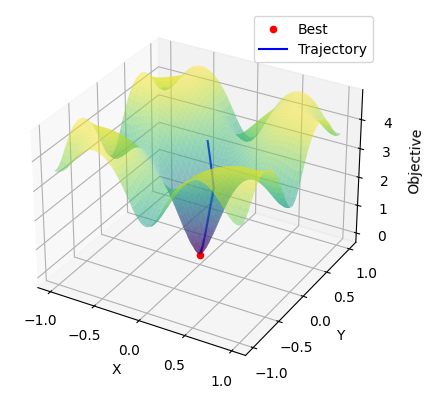

In [652]:

x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)
 
# Plot the optimization trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(adam_best[0], adam_best[1], objective(adam_best[0], adam_best[1]),
           color='red', label='Best')
ax.plot([point[0] for point in adam_solutions],
        [point[1] for point in adam_solutions], adam_scores,
        color='blue', label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective')
ax.legend()
 
# Show the plot
plt.show()

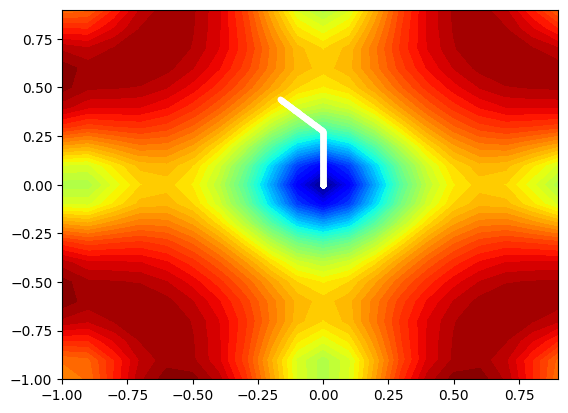

In [653]:
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
adam_solutions = asarray(adam_solutions)
plt.plot(adam_solutions[:, 0], adam_solutions[:, 1], '.-', color='w')
# show the plot
plt.show()

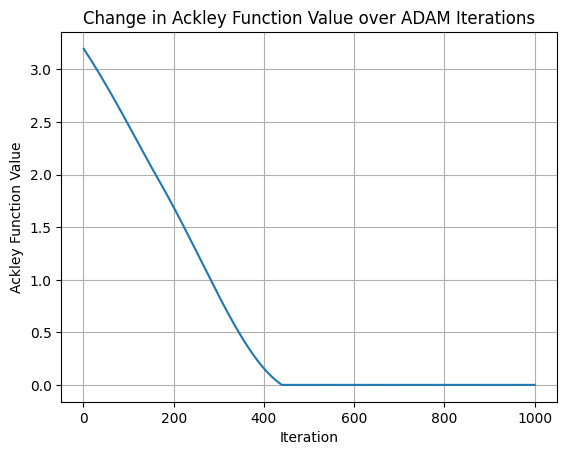

In [654]:
vals = []
for i in range(1000):
    vals.append(objective(adam_solutions[i][0], adam_solutions[i][1]))
plt.plot(range(1, 1001), vals)
plt.xlabel("Iteration")
plt.ylabel("Ackley Function Value")
plt.title("Change in Ackley Function Value over ADAM Iterations")
plt.grid(True)

#ADAN IMPLEMENTATION

In [655]:
def adan(objective, derivative, bounds, n_iter, alpha, beta1, beta2, beta3, decay, eps=1e-8):
	adan_solutions = []
	scores=[]
	# generate an initial point
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	score = objective(x[0], x[1])
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	n=  [0.0 for _ in range(bounds.shape[0])]
	neta=[alpha for _ in range(bounds.shape[0])]
	prev=[0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent updates
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(bounds.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = (1-beta1) * m[i] + (beta1) * g[i]
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = (1-beta2) * v[i] + beta2 * (g[i]-prev[i])
			
			n[i] = (1-beta3) * n[i] + beta3 *((g[i]+((1-beta2)*((g[i]-prev[i]))))**2)

			# correct_m, correct_v, correct_n = map(lambda n: 1 / (1 - (1 - n) ** (t+1)), (beta1, beta2, beta3))
			correct_n=n[i]*(1 - (1 - beta3) ** (t+1))
			correct_m=m[i]*(1 - (1 - beta1) ** (t+1))
			correct_v=v[i]*(1 - (1 - beta2) ** (t+1))

			# correct_n=
			neta[i]= alpha/(sqrt(correct_n)+eps)

			# mhat(t) = m(t) / (1 - beta1(t))
			# mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			# vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
			x[i] = (x[i]-(neta[i]*(correct_m+((1-beta2)*correct_v))))/(1+(decay*alpha))
		# evaluate candidate point
		score = objective(x[0], x[1])
		# keep track of solutions
		adan_solutions.append(x.copy())
		scores.append(score)
		prev=g
		# report progress
		if (score < 0.01): print('>%d f(%s) = %.5f' % (t, x, score))
	return x,scores,adan_solutions

In [656]:
# seed the pseudo random number generator
seed(1)

# define the total iterations
n_iter = 1000
# steps size
alpha =1e-3
# factor for average gradient
beta1 = 0.02
# factor for average squared gradient
beta2 = 0.01
# perform the gradient descent search with adam
beta3=0.01
decay=0.9

adan_best, adan_scores, adan_solutions = adan(objective, derivative, bounds, n_iter, alpha, beta1, beta2,beta3,decay)

>351 f([0.00221889 0.00244907]) = 0.00964
>352 f([0.00222488 0.00161393]) = 0.00798
>353 f([0.00217968 0.00078727]) = 0.00670
>354 f([ 2.08146193e-03 -2.82471489e-05]) = 0.00600
>355 f([ 0.00193369 -0.00082862]) = 0.00607
>356 f([ 0.00174546 -0.00160961]) = 0.00687
>357 f([ 0.00152802 -0.00236868]) = 0.00818
>358 f([ 0.00129097 -0.00310488]) = 0.00981
>443 f([-2.81813492e-05 -3.38746045e-03]) = 0.00989
>444 f([-0.00016944 -0.00293509]) = 0.00855
>445 f([-0.00030242 -0.00247774]) = 0.00723
>446 f([-0.00042195 -0.00201564]) = 0.00594
>447 f([-0.00052119 -0.00154915]) = 0.00469
>448 f([-0.00059099 -0.00107881]) = 0.00352
>449 f([-0.00061907 -0.00060574]) = 0.00247
>450 f([-0.00059045 -0.00013264]) = 0.00172
>451 f([-0.0004964  0.0003325]) = 0.00170
>452 f([-0.00035986  0.00077645]) = 0.00244
>453 f([-0.00021212  0.00119785]) = 0.00348
>454 f([-6.34724156e-05  1.59803661e-03]) = 0.00459
>455 f([8.10008692e-05 1.97752314e-03]) = 0.00570
>456 f([0.00021785 0.00233666]) = 0.00678
>457 f([0.00

In [657]:
adan_solutions

[array([-0.16578171,  0.44022771]),
 array([-0.16557634,  0.43977554]),
 array([-0.16533782,  0.43929041]),
 array([-0.16506562,  0.43877181]),
 array([-0.16475993,  0.43821988]),
 array([-0.16442121,  0.43763512]),
 array([-0.16405013,  0.43701817]),
 array([-0.16364744,  0.43636978]),
 array([-0.16321394,  0.43569075]),
 array([-0.16275047,  0.43498191]),
 array([-0.16225785,  0.43424409]),
 array([-0.16173695,  0.43347814]),
 array([-0.16118858,  0.43268486]),
 array([-0.16061356,  0.4318651 ]),
 array([-0.16001272,  0.43101964]),
 array([-0.15938685,  0.43014928]),
 array([-0.15873672,  0.42925479]),
 array([-0.1580631 ,  0.42833692]),
 array([-0.15736672,  0.42739641]),
 array([-0.15664833,  0.42643397]),
 array([-0.15590862,  0.42545031]),
 array([-0.15514829,  0.42444611]),
 array([-0.15436801,  0.42342204]),
 array([-0.15356843,  0.42237872]),
 array([-0.1527502,  0.4213168]),
 array([-0.15191394,  0.42023689]),
 array([-0.15106024,  0.41913957]),
 array([-0.15018971,  0.418025

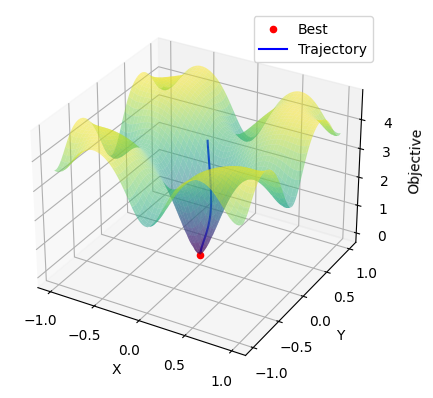

In [658]:
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)
 
# Plot the optimization trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(adan_best[0], adan_best[1], objective(adan_best[0], adan_best[1]),
           color='red', label='Best')
ax.plot([point[0] for point in adan_solutions],
        [point[1] for point in adan_solutions], adan_scores,
        color='blue', label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective')
ax.legend()
 
# Show the plot
plt.show()

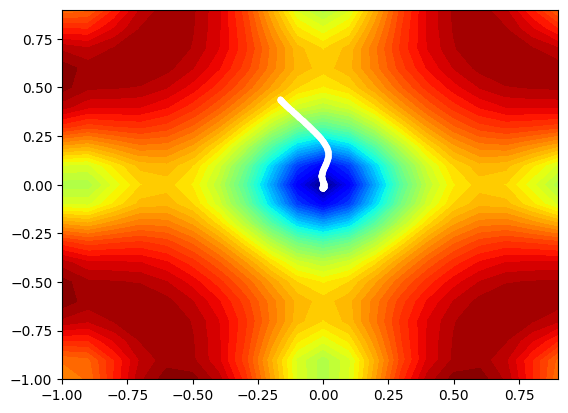

In [659]:
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
adan_solutions = asarray(adan_solutions)
plt.plot(adan_solutions[:, 0], adan_solutions[:, 1], '.-', color='w')
# show the plot
plt.show()

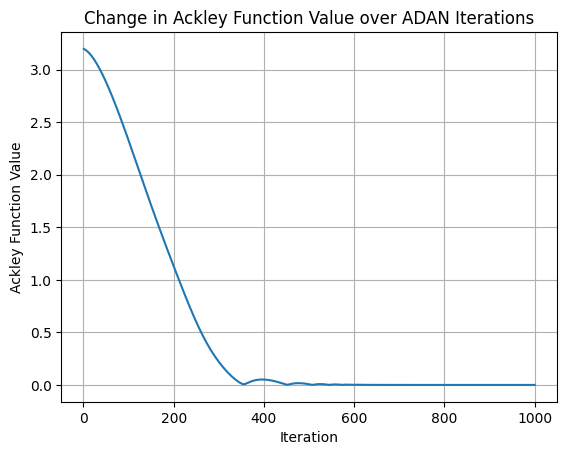

In [660]:
vals = []
for i in range(1000):
    vals.append(objective(adan_solutions[i][0], adan_solutions[i][1]))
plt.plot(range(1, 1001), vals)
plt.xlabel("Iteration")
plt.ylabel("Ackley Function Value")
plt.title("Change in Ackley Function Value over ADAN Iterations")
plt.grid(True)

# Comparison between ADAM and ADAN

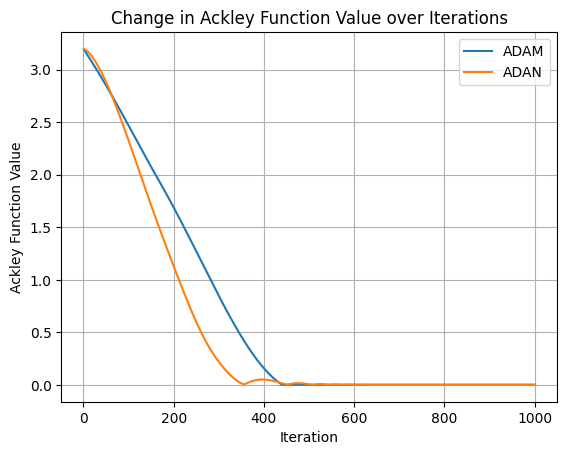

In [661]:
vals = []
for i in range(1000):
    vals.append(objective(adam_solutions[i][0], adam_solutions[i][1]))
plt.plot(range(1, 1001), vals, label="ADAM")

vals = []
for i in range(1000):
    vals.append(objective(adan_solutions[i][0], adan_solutions[i][1]))
plt.plot(range(1, 1001), vals, label="ADAN")

plt.xlabel("Iteration")
plt.ylabel("Ackley Function Value")
plt.title("Change in Ackley Function Value over Iterations")
plt.grid(True)
plt.legend()

# For multiple minima condition

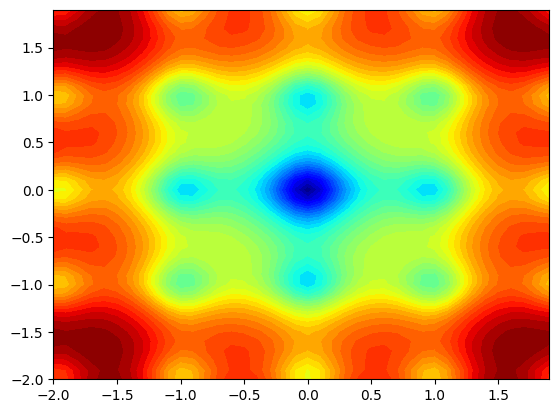

In [662]:
# define range for input
bounds = asarray([[-2.0, 2.0], [-2.0, 2.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
plt.show()

In [663]:

# define the total iterations
n_iter = 1000

# steps size
alpha = 1e-1
# factor for average gradient
beta1 = 0.01
# factor for average squared gradient
beta2 = 0.02

# perform the gradient descent search with adam
adam_best, adam_scores, adam_solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)

In [664]:
# seed the pseudo random number generator
seed(1)

# define the total iterations
n_iter = 1000
# steps size
alpha =1e-1
# factor for average gradient
beta1 = 0.02
# factor for average squared gradient
beta2 = 0.01
# perform the gradient descent search with adam
beta3=0.01
decay=0.9

adan_best, adan_scores, adan_solutions = adan(objective, derivative, bounds, n_iter, alpha, beta1, beta2,beta3,decay)

>57 f([ 0.00015599 -0.00044884]) = 0.00135
>58 f([ 0.00044162 -0.00180867]) = 0.00536
>59 f([ 0.00013658 -0.00137401]) = 0.00396
>60 f([-0.00029577  0.00069118]) = 0.00214
>61 f([7.41637809e-04 3.41249539e-05]) = 0.00211
>62 f([-0.00198778 -0.00019841]) = 0.00576
>63 f([-0.00036095 -0.00016756]) = 0.00113
>64 f([0.00314117 0.00069366]) = 0.00937
>65 f([0.00244007 0.00075951]) = 0.00740
>66 f([-0.00038545  0.00026074]) = 0.00132
>67 f([ 0.00020301 -0.00127033]) = 0.00368
>68 f([-0.00030904 -0.00015304]) = 0.00098
>69 f([0.00184899 0.00126216]) = 0.00647
>70 f([0.0008045  0.00102871]) = 0.00374
>71 f([-0.00128433 -0.00061919]) = 0.00409
>72 f([-0.00025027 -0.00070739]) = 0.00214
>73 f([0.00096104 0.00103986]) = 0.00406
>74 f([-2.66765175e-05  4.71443715e-04]) = 0.00134
>75 f([-0.00033339 -0.00178994]) = 0.00524
>76 f([-0.00014277 -0.00112408]) = 0.00324
>77 f([0.00023847 0.00106796]) = 0.00313
>78 f([-0.00011488  0.00042801]) = 0.00126
>79 f([ 0.00040144 -0.00164257]) = 0.00486
>80 f([ 1

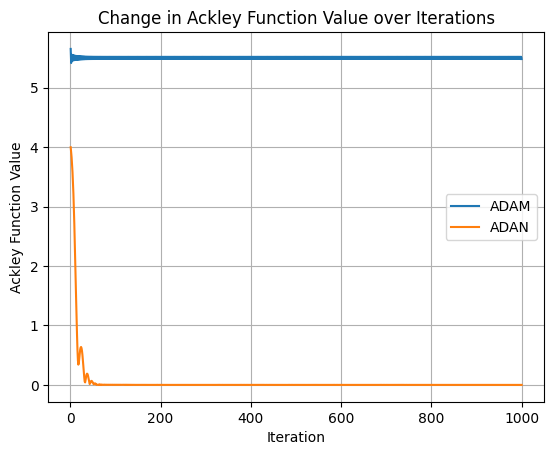

In [665]:
vals = []
for i in range(1000):
    vals.append(objective(adam_solutions[i][0], adam_solutions[i][1]))
plt.plot(range(1, 1001), vals, label="ADAM")

vals = []
for i in range(1000):
    vals.append(objective(adan_solutions[i][0], adan_solutions[i][1]))
plt.plot(range(1, 1001), vals, label="ADAN")

plt.xlabel("Iteration")
plt.ylabel("Ackley Function Value")
plt.title("Change in Ackley Function Value over Iterations")
plt.grid(True)
plt.legend()